<a href="https://colab.research.google.com/github/RobsonCrLira/CodenationDesafio/blob/master/Analise_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio do Codenation - ENEM 2016



Importação dos dados e das bibliotecas que irei utilizar

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train =  pd.read_csv('/content/drive/My Drive/ENEM/train.csv')
test =  pd.read_csv('/content/drive/My Drive/ENEM/test.csv')

In [35]:
print(train.shape)
print(test.shape)

(13730, 167)
(4576, 47)


Analise exploratorias dos dados

In [4]:
#conhecendo todas as colunas do sheet
colunas = train.columns
colunas.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
       'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',

In [0]:
colunas_notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP1',
                 'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']
colunas_n = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

In [6]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [7]:
#encontrando todos os tados nulos no datasheet e aprensentando em quantidade total e porcentagem no volume de dados do datasheet
total_zeros_sum = train.isnull().sum().sort_values(ascending=False)
total_zeros_count = train.isnull().count()
porcentagem =(total_zeros_sum/total_zeros_count).sort_values(ascending=False)
dados_nulos = pd.concat([total_zeros_sum,porcentagem], axis=1,keys=["Total","Pocentagem"])
dados_nulos.head(10)


,Total,Pocentagem
CO_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
NO_ENTIDADE_CERTIFICACAO,12092,0.880699
SG_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
Q041,10792,0.786016
TP_SIT_FUNC_ESC,9448,0.688128
TP_LOCALIZACAO_ESC,9448,0.688128
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
CO_UF_ESC,9448,0.688128
NO_MUNICIPIO_ESC,9448,0.688128
CO_MUNICIPIO_ESC,9448,0.688128


In [8]:
cont = 0
for valor in colunas:
    if( (train[valor].isnull().sum()) > 0):
        zero_coluna = train[valor].isnull().sum()
        cont = cont + 1
        print(f"Coluna {valor} possui {zero_coluna} valores nulos")
print(cont)

Coluna TP_ESTADO_CIVIL possui 528 valores nulos
Coluna CO_MUNICIPIO_NASCIMENTO possui 609 valores nulos
Coluna NO_MUNICIPIO_NASCIMENTO possui 609 valores nulos
Coluna CO_UF_NASCIMENTO possui 609 valores nulos
Coluna SG_UF_NASCIMENTO possui 609 valores nulos
Coluna TP_ENSINO possui 9448 valores nulos
Coluna CO_ESCOLA possui 9448 valores nulos
Coluna CO_MUNICIPIO_ESC possui 9448 valores nulos
Coluna NO_MUNICIPIO_ESC possui 9448 valores nulos
Coluna CO_UF_ESC possui 9448 valores nulos
Coluna SG_UF_ESC possui 9448 valores nulos
Coluna TP_DEPENDENCIA_ADM_ESC possui 9448 valores nulos
Coluna TP_LOCALIZACAO_ESC possui 9448 valores nulos
Coluna TP_SIT_FUNC_ESC possui 9448 valores nulos
Coluna NO_ENTIDADE_CERTIFICACAO possui 12092 valores nulos
Coluna CO_UF_ENTIDADE_CERTIFICACAO possui 12092 valores nulos
Coluna SG_UF_ENTIDADE_CERTIFICACAO possui 12092 valores nulos
Coluna NU_NOTA_CN possui 3389 valores nulos
Coluna NU_NOTA_CH possui 3389 valores nulos
Coluna NU_NOTA_LC possui 3597 valores nulo

Desta parte em diante foi feita uma pesquisa de tipos de inscritos fizeram a prova.

Olhando seu sexo, etnia(Raça), ano de conclusão, tipo de ensino e se é treineiro.

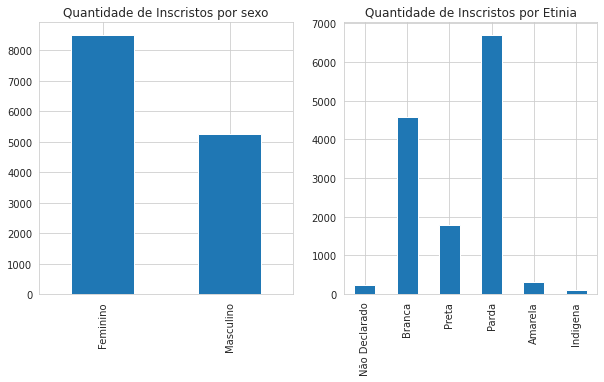

In [19]:
sns.set_style('whitegrid')
f, axes = plt.subplots(1, 2, figsize=(10, 5))

df_tp_sexo = train.groupby('TP_SEXO')['TP_SEXO'].count()
df_tp_sexo.index = ["Feminino", "Masculino"]
df_tp_sexo.plot(kind='bar',title = 'Quantidade de Inscritos por sexo', ax=axes[0])

df_tp_raca = train.groupby('TP_COR_RACA')['TP_COR_RACA'].count()
#df_tp_raca.index = ["Não Declarado", "Branca", "Preta", "Parda", "Amarela", "Indigena","Não Dispoe"]
#No base encontrada são apenas 6 declarações: "Não Declarado", "Branca", "Preta", "Parda", "Amarela", "Indigena" a ->
#-> 7 - "Não Dispoe" não foi informada pelos inscritos
df_tp_raca.index = ["Não Declarado", "Branca", "Preta", "Parda", "Amarela", "Indigena"]
df_tp_raca.plot(kind='bar',title = 'Quantidade de Inscritos por Etinia', ax=axes[1])

plt.show()

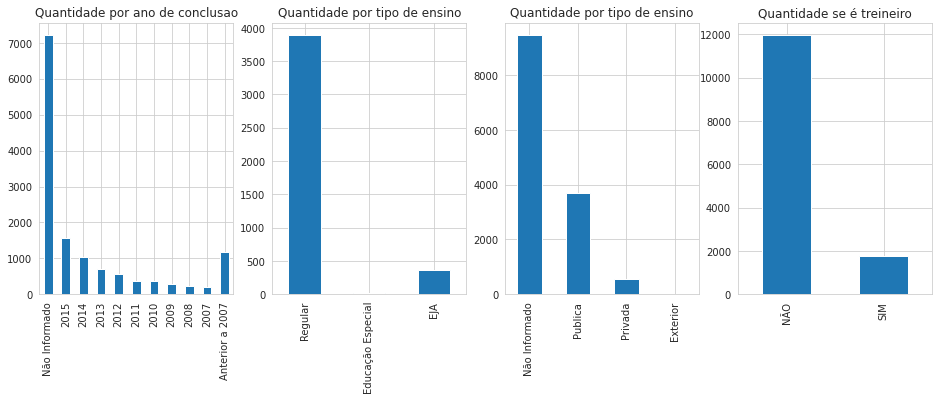

In [54]:
f, axes = plt.subplots(1,4, figsize=(16, 5))

df_ano_conclusao = train.groupby('TP_ANO_CONCLUIU')['TP_ANO_CONCLUIU'].count().sort_index()
df_ano_conclusao.index = ["Não Informado",2015,2014,2013,2012,2011,2010,2009,2008,2007,"Anterior a 2007"]
df_ano_conclusao.plot(kind='bar',title = 'Quantidade por ano de conclusao',ax=axes[0])

df_tp_ensino = train.groupby('TP_ENSINO')['TP_ENSINO'].count().sort_index()
df_tp_ensino.index = ["Regular", "Educação Especial", "EJA"]
df_tp_ensino.plot(kind='bar',title = 'Quantidade por tipo de ensino',ax=axes[1])

df_tp_escola = train.groupby('TP_ESCOLA')['TP_ESCOLA'].count().sort_index()
df_tp_escola.index = ["Não Informado","Publica" ,"Privada" ,"Exterior"]
df_tp_escola.plot(kind='bar',title = 'Quantidade por tipo de ensino',ax=axes[2])

df_treineiro = train.groupby('IN_TREINEIRO')['IN_TREINEIRO'].count().sort_index()
df_treineiro.index = ["NÃO","SIM"]
df_treineiro.plot(kind='bar',title = 'Quantidade se é treineiro',ax=axes[3])